In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean
import torch
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import torch
from torch.utils.data import Dataset
from PIL import Image

from torch import nn

In [ ]:
import io
import pandas as pd
import numpy as np

!unzip -u "/content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset A.zip" -d "/content/drive/MyDrive/Colab Notebooks/Soft Computing/DatasetA_softcomputing2"

Archive:  /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset A.zip


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soft Computing/DatasetA_softcomputing2/training-a.csv', low_memory=False)
df.head()

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


In [ ]:
col = list(df.columns)

In [ ]:
drop_col = []
for i in col:
  if i!= 'filename' and i!= 'digit':
    drop_col.append(i)

print(drop_col)

['original filename', 'scanid', 'database name original', 'contributing team', 'database name']


In [ ]:
df = df.drop(columns=drop_col)
df

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
...,...,...
19697,a19697.png,4
19698,a19698.png,3
19699,a19699.png,8
19700,a19700.png,3


In [ ]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 180*180
num_hidden = 200  
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
mean = [0.5,]
std = [0.5, ]

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(180),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(180),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
Path = '/content/drive/MyDrive/Colab Notebooks/Soft Computing/DatasetA_softcomputing2/training-a'

In [ ]:
train_data  = Dataset(df, Path, train_transform)
test_data = Dataset(df, Path, test_transform)

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)        
        self.relu_1 = nn.ReLU()
         
        self.linear_2 = nn.Linear(num_hidden, num_hidden)    
        self.relu_2 = nn.ReLU()
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)   
        self.relu_3 = nn.ReLU()
  
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
    
        self.linear_5= nn.Linear(num_hidden, num_hidden) 
        self.relu_5= nn.ReLU()

        self.linear_6 = nn.Linear(num_hidden, num_hidden) 
        self.relu_6 = nn.ReLU()
  
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        # 1st  layer
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

NeuralNetworkModel(
  (linear_1): Linear(in_features=16384, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2997326850891113. Accuracy: 9.973606740432443
Iteration: 1000. Loss: 2.30060076713562. Accuracy: 10.06496802355091
Iteration: 1500. Loss: 2.302339553833008. Accuracy: 10.070043650390824
Iteration: 2000. Loss: 2.3025081157684326. Accuracy: 9.973606740432443
Iteration: 2500. Loss: 2.3036370277404785. Accuracy: 16.358745305045172
Iteration: 3000. Loss: 2.299673557281494. Accuracy: 10.237539336108009
Iteration: 3500. Loss: 2.30009126663208. Accuracy: 19.292457618515886
Iteration: 4000. Loss: 2.2891392707824707. Accuracy: 16.91198863059588
Iteration: 4500. Loss: 2.2744996547698975. Accuracy: 15.28271241498325
Iteration: 5000. Loss: 2.2784793376922607. Accuracy: 20.58166683585423
Iteration: 5500. Loss: 2.2399699687957764. Accuracy: 19.525936453151964
Iteration: 6000. Loss: 2.377492666244507. Accuracy: 18.75951680032484
Iteration: 6500. Loss: 2.298922300338745. Accuracy: 20.876053192569284
Iteration: 7000. Loss: 2.059671640396118. Accuracy: 24.291950055831894
Iteration

In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soft Computing/softCom2.csv', names=["I", "Iteration", "L", "Loss", "A", "Accuracy"], low_memory=False)
df2.head()

,I,Iteration,L,Loss,A,Accuracy
0,Iteration:,500,Loss:,2.2997326850891113.,Accuracy:,9.973607
1,Iteration:,1000,Loss:,2.30060076713562.,Accuracy:,10.064968
2,Iteration:,1500,Loss:,2.302339553833008.,Accuracy:,10.070044
3,Iteration:,2000,Loss:,2.3025081157684326.,Accuracy:,9.973607
4,Iteration:,2500,Loss:,2.3036370277404785.,Accuracy:,16.358745


In [13]:
Iteration = df2['Iteration'].tolist()
Loss = [2.2997326850891113, 2.30060076713562, 2.302339553833008, 2.3025081157684326,
        2.3036370277404785, 2.299673557281494, 2.30009126663208, 2.2891392707824707, 
        2.2744996547698975, 2.2784793376922607, 2.2399699687957764, 2.377492666244507, 
        2.298922300338745, 2.059671640396118, 2.2406883239746094, 2.0458905696868896,
        1.9649463891983032, 1.8636722564697266, 1.8292611837387085, 1.7158381938934326, 
        1.5840826034545898, 1.444767713546753, 1.4311721324920654, 1.4814293384552002, 
        1.4003965854644775, 1.407137155532837, 2.082312822341919, 1.6082274913787842, 
        1.8230177164077759, 1.2541757822036743, 1.5678730010986328, 1.4646532535552979, 
        1.2779384851455688, 1.2653868198394775, 0.8712750673294067, 1.0583735704421997, 
        1.530137062072754, 0.9985934495925903, 1.1651538610458374]
Accuracy = df2['Accuracy'].tolist()

In [14]:
print(min(Loss))
print(max(Accuracy))

0.8712750673294067
64.54674652


In [15]:
print(Iteration)
print(Loss)
print(Accuracy)

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500]
[2.2997326850891113, 2.30060076713562, 2.302339553833008, 2.3025081157684326, 2.3036370277404785, 2.299673557281494, 2.30009126663208, 2.2891392707824707, 2.2744996547698975, 2.2784793376922607, 2.2399699687957764, 2.377492666244507, 2.298922300338745, 2.059671640396118, 2.2406883239746094, 2.0458905696868896, 1.9649463891983032, 1.8636722564697266, 1.8292611837387085, 1.7158381938934326, 1.5840826034545898, 1.444767713546753, 1.4311721324920654, 1.4814293384552002, 1.4003965854644775, 1.407137155532837, 2.082312822341919, 1.6082274913787842, 1.8230177164077759, 1.2541757822036743, 1.5678730010986328, 1.4646532535552979, 1.2779384851455688, 1.2653868198394775, 0.8712750673294067, 1.0583735704421997, 1.530137062072754, 0.9985934495925903

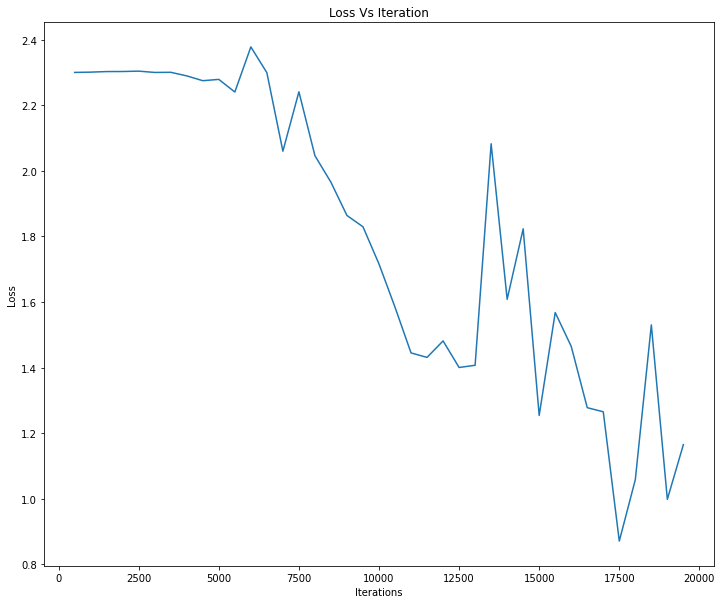

In [16]:
x= np.array(Iteration)
y= np.array(Loss)
plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.title("Loss Vs Iteration")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

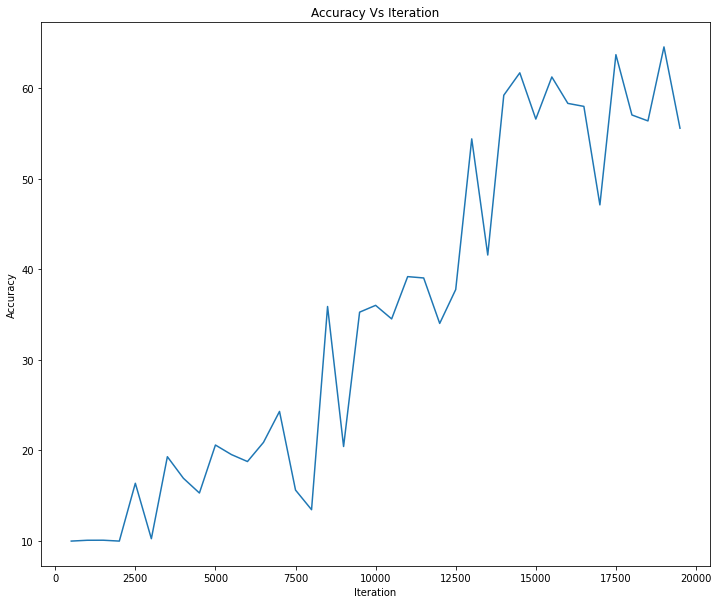

In [11]:
y= np.array(Accuracy)
x= np.array(Iteration)
plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.title("Accuracy Vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
len(test_loader)

986

In [ ]:
!unzip -u "/content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset_2.zip" -d "/content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2"

Archive:  /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset_2.zip
   creating: /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/
  inflating: /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/t10k-images-idx3-ubyte  
  inflating: /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/t10k-labels-idx1-ubyte  
  inflating: /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/train-images-idx3-ubyte  
  inflating: /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/train-labels-idx1-ubyte  
  inflating: /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/verification_test.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/verification_train.csv  


In [ ]:
verification_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/verification_train.csv', low_memory=False)
verification_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
verification_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Soft Computing/Dataset2_softcomputing2/Dataset_2/verification_test.csv', low_memory=False)
verification_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
